# Final Project #  
**Adam Elias**  

## Standard Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


## Imports for specific models
In this section, you will import the models from SKLearn that you will use this in this notebook.

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.svm import SVC, SVR, LinearSVC, LinearSVR
#These imports are specific to performing Linear Regression using the SKLearn and statsmodels libraries

## Imports for Splitting Data and Building Pipeline


In [6]:
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn import set_config
set_config(display='diagram')

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

# Imports for Performance Measures

In [7]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

## Confusion Matrix Function
This function is for creating a graphical version of the confusion matrix.



In [8]:
def plot_cm(y_test, y_pred):
    cm = confusion_matrix(y_test,y_pred)
    fig = plt.figure(figsize=(10,10))
    heatmap = sns.heatmap(cm, annot=True, fmt='.2f', cmap='RdYlGn')
    plt.ylabel('True label')
    plt.xlabel('Predicted Label')

# ROC_Curve Function
This function is for plotting the roc_curve

In [9]:
def plot_roc_curve(fpr,tpr):
  plt.plot(fpr, tpr, linewidth=2)
  plt.plot([0,1],[0,1], 'k--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.0])

## Problem 1

### Reading the Data

In [10]:
df = pd.read_csv('/content/gdrive/MyDrive/CS430/WebDevelopment.csv')
#data from https://data.world/chasewillden/web-development-courses-from-udemy

### Statistical and Visual Exploration

In [11]:
df.describe()

,id,numSubscribers,numReviews,numPublishedLectures,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15
count,1.200000e+03,1200.000000,1200.000000,1200.00000,0.0,0.0,0.0,0.0,0.0
mean,7.068543e+05,6650.476667,358.354167,52.81750,NaN,NaN,NaN,NaN,NaN
std,3.289244e+05,14613.648207,1574.814468,62.81375,NaN,NaN,NaN,NaN,NaN
min,8.324000e+03,19.000000,0.000000,5.00000,NaN,NaN,NaN,NaN,NaN
25%,4.757115e+05,1127.500000,25.000000,19.00000,NaN,NaN,NaN,NaN,NaN
50%,7.384560e+05,2416.500000,65.000000,32.00000,NaN,NaN,NaN,NaN,NaN
75%,9.752715e+05,6894.750000,179.250000,63.25000,NaN,NaN,NaN,NaN,NaN
max,1.277924e+06,268923.000000,27445.000000,779.00000,NaN,NaN,NaN,NaN,NaN


In [12]:
df.drop(columns=['Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15'], inplace=True)


In [13]:
df.head()

,id,title,url,isPaid,price,numSubscribers,numReviews,numPublishedLectures,instructionalLevel,contentInfo,publishedTime
0,28295,Learn Web Designing & HTML5/CSS3 Essentials in...,https://www.udemy.com/build-beautiful-html5-we...,True,75,43285,525,24,All Levels,4 hours,2013-01-03T00:55:31Z
1,19603,Learning Dynamic Website Design - PHP MySQL an...,https://www.udemy.com/learning-dynamic-website...,True,50,47886,285,125,All Levels,12.5 hours,2012-06-18T16:52:34Z
2,889438,ChatBots: Messenger ChatBot with API.AI and No...,https://www.udemy.com/chatbots/,True,50,2577,529,64,All Levels,4.5 hours,2016-06-30T16:57:08Z
3,197836,Projects in HTML5,https://www.udemy.com/projects-in-html5/,True,60,8777,206,75,Intermediate Level,15.5 hours,2014-06-17T05:43:50Z
4,505208,Programming Foundations: HTML5 + CSS3 for Entr...,https://www.udemy.com/html-css-more/,True,20,23764,490,58,Beginner Level,5.5 hours,2015-10-17T04:52:25Z


In [14]:
df.sample(5)

,id,title,url,isPaid,price,numSubscribers,numReviews,numPublishedLectures,instructionalLevel,contentInfo,publishedTime
863,774648,Learn Authentication With ASP.NET Identity Sec...,https://www.udemy.com/learn-authentication-wit...,True,50,305,45,13,All Levels,2 hours,2016-02-26T17:41:37Z
982,681514,Complete PHP Course with OOP Start to Finish!,https://www.udemy.com/complete-object-oriented...,True,200,4529,54,29,All Levels,2 hours,2015-11-26T22:25:33Z
1065,495958,Build Advanced Responsive Websites with Founda...,https://www.udemy.com/foundation-5-sass-learn-...,True,200,1276,245,271,All Levels,22.5 hours,2015-07-08T22:31:50Z
429,1243474,Ultimate Css & JQuery Form Designing From Begi...,https://www.udemy.com/ultimate-css-web-form-de...,True,115,783,5,13,All Levels,1 hour,2017-06-09T00:12:57Z
643,1128560,JavaScript - Become Higly Paid Front End Devel...,https://www.udemy.com/javascript-become-higly-...,True,105,710,137,49,Beginner Level,3.5 hours,2017-04-17T16:39:08Z


In [15]:
df.count()

id                      1200
title                   1200
url                     1200
isPaid                  1200
price                   1200
numSubscribers          1200
numReviews              1200
numPublishedLectures    1200
instructionalLevel      1200
contentInfo             1200
publishedTime           1200
dtype: int64

In [16]:
isPaid_counts = df['isPaid'].groupby(df['isPaid']).count()
isPaid_counts.columns = ['isPaid', 'Count']

In [17]:
isPaid_counts

isPaid
False     133
True     1067
Name: isPaid, dtype: int64

In [18]:
instructionalLevel_counts = df['instructionalLevel'].groupby(df['instructionalLevel']).count()
instructionalLevel_counts.columns = ['instructionalLevel', 'Count']

In [19]:
instructionalLevel_counts

instructionalLevel
All Levels            659
Beginner Level        391
Expert Level           15
Intermediate Level    135
Name: instructionalLevel, dtype: int64

<Axes: xlabel='instructionalLevel'>

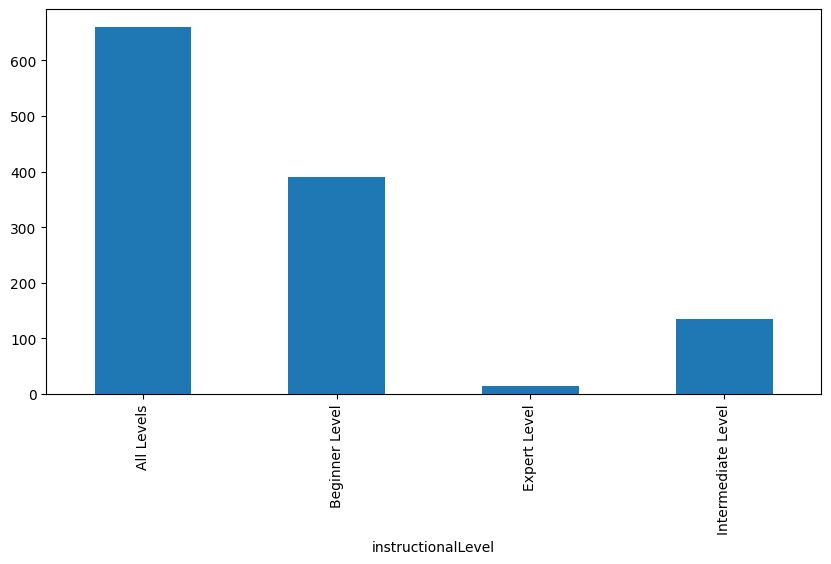

In [20]:
instructionalLevel_counts.plot(kind='bar', x='instructionalLevel', y='count', figsize=(10,5))

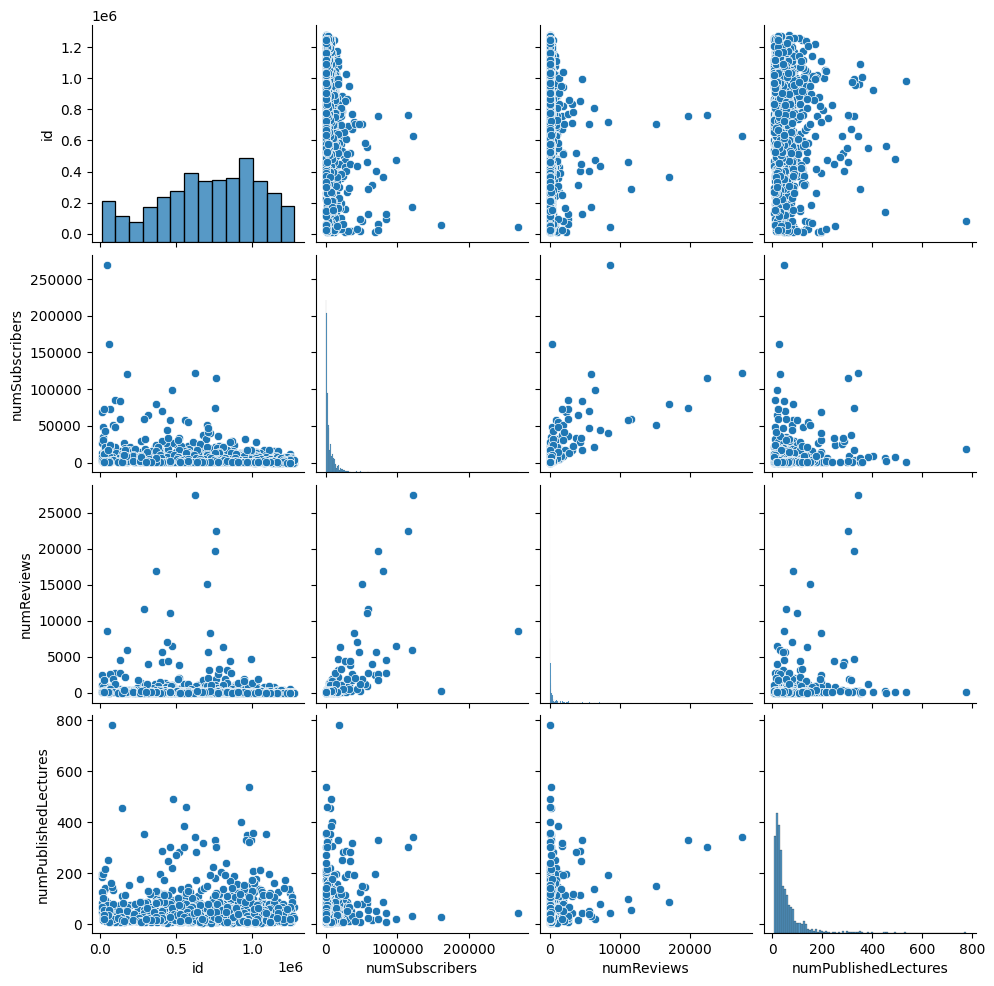

In [21]:
sns.pairplot(df.select_dtypes(include=['float64', 'int64']))

### Splitting Data into Train/Test

In [22]:
X = df.drop(columns=['id', 'title', 'url', 'price', 'contentInfo', 'publishedTime'])

In [23]:
y = df['numSubscribers']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=32)

### Building the Pipeline

Transform the columns using the MinMaxScaler and OneHotEncoder.

Determine which attributes are numerical and which are categorical for the pipeline.

In [25]:
num_attribs = ['numReviews', 'numPublishedLectures']
cat_attribs = ['isPaid', 'instructionalLevel']


Set up a preprocessor transformer to apply the train and test.

In [26]:
col_transform = ColumnTransformer(transformers=[
                               ('cat',OneHotEncoder(), cat_attribs)],
                               remainder='passthrough'
                  )

MinMaxScaler puts all of the numeric variables on the same scale.

Create the pipeline. Set max iterations, enough so the algorithm settles on a solution.

In [27]:
pipeline = Pipeline([
    ('trans', col_transform),
    ('mlr_model', LinearRegression())])

In [28]:
pipeline
#look at the pipeline I've created

Pipeline(steps=[('trans',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat', OneHotEncoder(),
                                                  ['isPaid',
                                                   'instructionalLevel'])])),
                ('mlr_model', LinearRegression())])

### Executing the Model

Model 1: Linear regression

In [29]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('trans',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat', OneHotEncoder(),
                                                  ['isPaid',
                                                   'instructionalLevel'])])),
                ('mlr_model', LinearRegression())])

### Evaluating Model

Model 1: Evaluating the linear regression

In [30]:
y_train_pred_lr = pipeline.predict(X_train)
y_test_pred_lr = pipeline.predict(X_test)
print("RMSE train: ", mean_squared_error(y_train, y_train_pred_lr)**(0.5))
print("RMSE test: ", mean_squared_error(y_test, y_test_pred_lr)**(0.5))

RMSE train:  3.480162060785143e-12
RMSE test:  3.2202549140588107e-12


### Conclusion
Write a general conclusion about the results of your model.

## Problem 2: SVM

### Reading the Data

### Splitting Data into Train/Test

### Building the Pipeline

Now doing the same thing for a Support Vector Machine (SVM).

In [31]:
col_transform_SVM = ColumnTransformer(transformers=[
    ('num', MinMaxScaler(), num_attribs),
    ('cat', OneHotEncoder(), cat_attribs)
])

In [32]:
pipeline_SVM = Pipeline([
    ('trans', col_transform_SVM),
    ('SVMLinear', SVR(kernel="linear", C=1, max_iter=100000))
])

In [33]:
pipeline_SVM

Pipeline(steps=[('trans',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  ['numReviews',
                                                   'numPublishedLectures']),
                                                 ('cat', OneHotEncoder(),
                                                  ['isPaid',
                                                   'instructionalLevel'])])),
                ('SVMLinear', SVR(C=1, kernel='linear', max_iter=100000))])

### Executing the Model

In [34]:
pipeline_SVM.fit(X_train,np.ravel(y_train))

Pipeline(steps=[('trans',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  ['numReviews',
                                                   'numPublishedLectures']),
                                                 ('cat', OneHotEncoder(),
                                                  ['isPaid',
                                                   'instructionalLevel'])])),
                ('SVMLinear', SVR(C=1, kernel='linear', max_iter=100000))])

### Evaluating Model

In [35]:
y_test_pred_SVM = pipeline_SVM.predict(X_test)
y_train_pred_SVM = pipeline_SVM.predict(X_train)

In [36]:
# Calculate RMSE for SVM training data
rmse_train_svm = np.sqrt(mean_squared_error(y_train, y_train_pred_SVM))

# Calculate RMSE for SVM testing data
rmse_test_svm = np.sqrt(mean_squared_error(y_test, y_test_pred_SVM))

print("SVM RMSE train: ", rmse_train_svm)
print("SVM RMSE test: ", rmse_test_svm)

SVM RMSE train:  16012.659949051069
SVM RMSE test:  11208.005070774681


### Conclusion
Write a general conclusion about the results of your model.